# **Class Imbalance**

Class Imbalance occurs when classes in a dataset are not represented equally.
One class(majority) dominates while another(minority) has fewer samples.

Class imbalance is a common issue in machine learning, particularly in classification tasks. 
It can lead to biased models that perform poorly on the minority class. 

Techniques such as resampling, using different evaluation metrics, and employing specialized algorithms can help address this issue.

Our goal is to create a balanced training dataset (eg., aiming for a 50:50 ratio) for better model performance.

Common metrics for evaluating the performance of a model are accuracy, precision, recall, F1 score, confusion matrix.
Accuracy score never helps in evaluating the performance of a model when the dataset is imbalanced.
Precison and recall are the most important metrics for evaluating the performance of a model when the dataset is imbalanced.

**Problems with imbalanced datasets:**
1. Class imbalance can lead to biased models that favor the majority class.
2. It can result in poor generalization to the minority class.
3. Evaluation metrics like accuracy can be misleading in imbalanced scenarios.
4. It can cause overfitting to the majority class.
5. It can lead to under-representation of the minority class in the model's predictions.
6. It can complicate the training process, requiring more sophisticated techniques to handle the imbalance.
7. It can result in longer training times due to the need for specialized handling of imbalanced data.
8. It can lead to a lack of diversity in the model's learned features.


Ways to fix class imbalance in a dataset:
- Oversampling the minority class - this involves duplicating examples from the minority class to balance the dataset. Oversampling can however lead to overfitting, especially if the synthetic samples are too similar to the original ones. It is important to balance the dataset without introducing too much noise.
- Undersampling the majority class - this involves removing examples from the majority class to balance the dataset. Undersampling can however lead to loss of important information, especially if the dataset is small or if the minority class is significantly underrepresented. It is often used in conjunction with other techniques such as oversampling the minority class or using algorithms that are robust to class imbalance.
- Using synthetic data generation techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples of the minority class.
- Using class weights in the loss function to give more importance to the minority class during training.   
- Using ensemble methods like Random Forest or Gradient Boosting that can handle class imbalance better than single classifiers.
- Using anomaly detection techniques to treat the minority class as anomalies and train a model to detect them.
- Using cost-sensitive learning where the model is penalized more for misclassifying the minority class.
- Using stratified sampling to ensure that each class is represented proportionally in training and validation sets.
- Using data augmentation techniques to artificially increase the size of the minority class by applying transformations like rotation, scaling, or flipping to existing examples.
- Using transfer learning to leverage pre-trained models that may have learned features relevant to the minority class.
- Using focal loss instead of standard cross-entropy loss to focus more on hard-to-classify examples, which are often from the minority class.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Total number of transactions
print("Total transactions (samples):", df.shape[0])

# Check class distribution
print("\nClass distribution:")
print(df['Class'].value_counts())

# Get fraud percentage
fraud_rate = (df['Class'].value_counts()[1] / df.shape[0]) * 100
print(f"\nFraud rate: {fraud_rate:.3f}%")


Total transactions (samples): 284807

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud rate: 0.173%


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
# Downcast float columns (e.g., float64 -> float32)
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')

# Downcast integer columns (e.g., int64 -> int32)
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

In [21]:
print("\nData types after downcasting:")
print(df.dtypes)
print(df.info())


Data types after downcasting:
Time      float32
V1        float32
V2        float32
V3        float32
V4        float32
V5        float32
V6        float32
V7        float32
V8        float32
V9        float32
V10       float32
V11       float32
V12       float32
V13       float32
V14       float32
V15       float32
V16       float32
V17       float32
V18       float32
V19       float32
V20       float32
V21       float32
V22       float32
V23       float32
V24       float32
V25       float32
V26       float32
V27       float32
V28       float32
Amount    float64
Class        int8
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 

In [22]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\anany\AppData\Local\Temp\ipykernel_15380\529207907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="Set3")


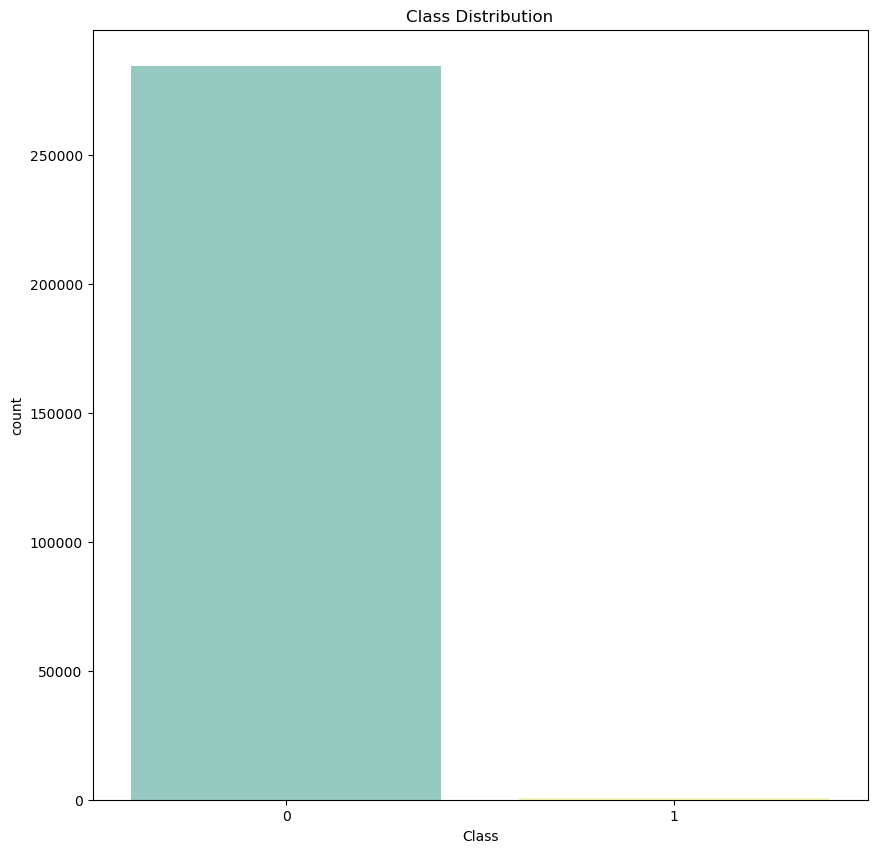

In [23]:
plt.figure(figsize=(10, 10))
sns.countplot(x="Class", data=df, palette="Set3")
plt.title("Class Distribution")
plt.show()

In [24]:
X = df.drop('Class', axis=1)
y = df["Class"]

In [25]:
# stratify ensures that the class distribution is preserved in both training and test sets
# stratify=y ensures that the split maintains the same proportion of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [26]:
model = RandomForestClassifier(
    n_estimators=80,      # Fewer trees
    max_samples=0.7,      # Each tree uses 70% of the data
    n_jobs=1,             # Crucial: Disable parallel processing
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.7, n_estimators=80, n_jobs=1,
                       random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85291     4]
 [   35   113]]


In [29]:
from sklearn.metrics import accuracy_score

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Model Score:", model.score(X_test, y_test))

Accuracy Score: 0.9995435553526912
Model Score: 0.9995435553526912


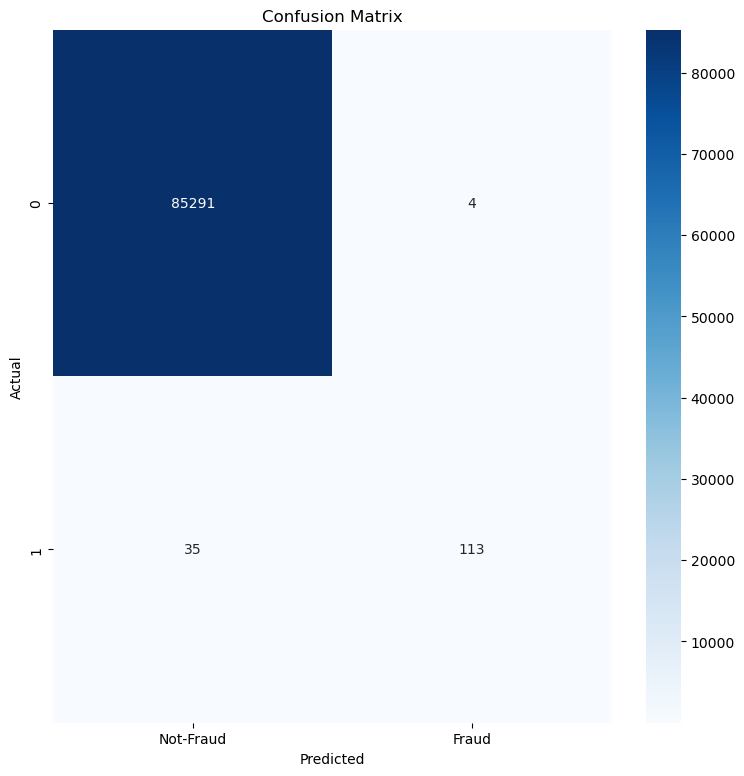

In [30]:
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Oversampling with RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [32]:
class_count = y_resampled.value_counts()
class_count_2 = X_resampled.value_counts()
display(class_count)
display(class_count_2)

Class
0    199020
1    199020
Name: count, dtype: int64

Time      V1          V2          V3          V4          V5          V6         V7          V8          V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount
68207.0   -13.192671   12.785971  -9.906650    3.320337   -4.801176    5.760058  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711   -0.226074  -6.211557   -6.248146   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.00      2166
94362.0   -26.457745   16.497473  -30.177317   8.904157   -17.892599  -1.227904  -31.197329  -11.438920  -9.462573  -22.187088   4.419997  -10.592305  -0.703796  -3.926207   -2.400246  -6.809890   -12.462315  -5.501051  -0.567940   2.812241  -8.755698    3.460893   0.896537   0.254836  -0.738097  -0.966564  -7.2634

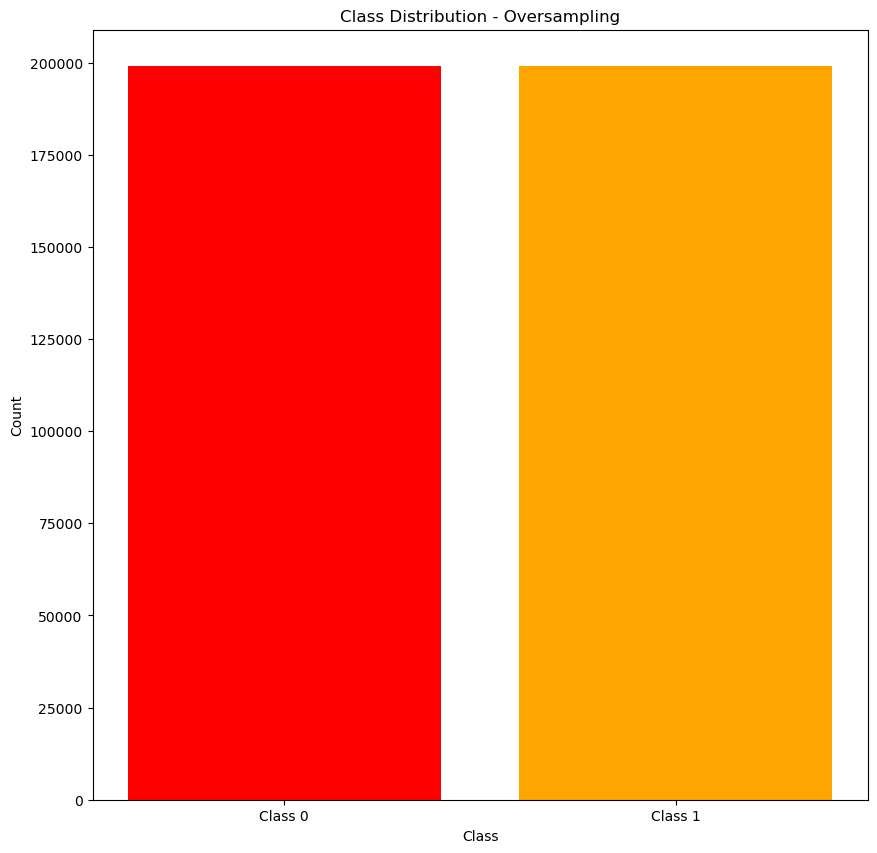

In [33]:
plt.figure(figsize=(10, 10))
plt.bar(class_count.index, class_count.values, color=['red', 'orange'])
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution - Oversampling')
plt.show()

In [34]:
model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_samples=0.7, n_estimators=80, n_jobs=1,
                       random_state=42)

In [35]:
y_pred_ros = model.predict(X_test)
print(y_pred_ros)

[0 0 0 ... 0 0 0]


In [36]:
print("Classification Report - Oversampling:\n", classification_report(y_test, y_pred_ros))
print("Confusion Matrix - Oversampling:\n", confusion_matrix(y_test, y_pred_ros))
print("Accuracy Score - Oversampling:", accuracy_score(y_test, y_pred_ros))
print("Model Score - Oversampling:", model.score(X_resampled, y_resampled))

Classification Report - Oversampling:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.75      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix - Oversampling:
 [[85290     5]
 [   37   111]]
Accuracy Score - Oversampling: 0.9995084442259752
Model Score - Oversampling: 0.9999924630690383


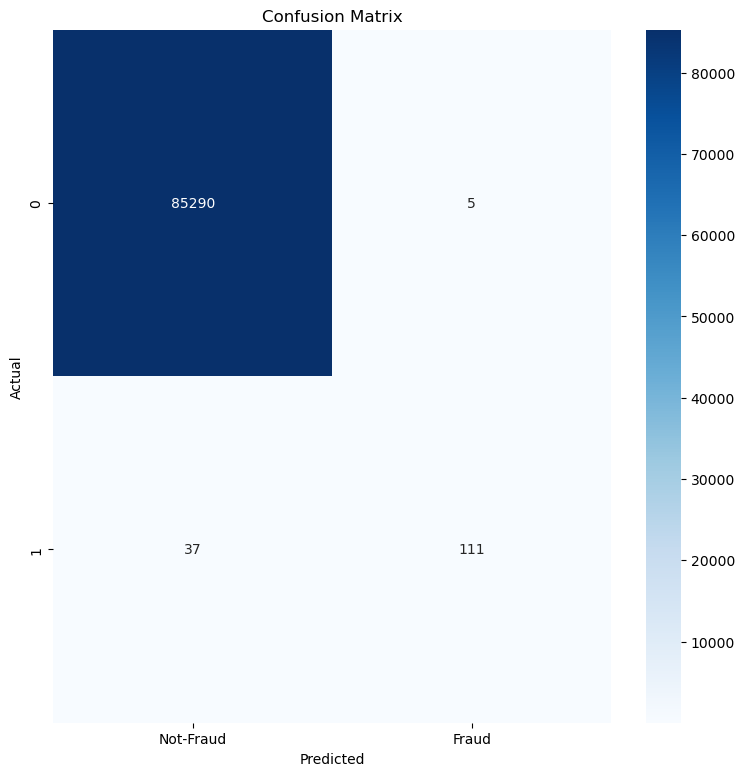

In [37]:
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix(y_test, y_pred_ros), annot=True, fmt='d', cmap='Blues', xticklabels=['Not-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
#SMOTE

smote = SMOTE(random_state=40)
X_resampled_2, y_resampled_2 = smote.fit_resample(X_train, y_train)

d:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^

In [39]:
class_count_3 = y_resampled_2.value_counts()
class_count_4 = X_resampled_2.value_counts()
display(class_count_3)
display(class_count_4)

Class
0    199020
1    199020
Name: count, dtype: int64

Time           V1          V2          V3          V4         V5          V6         V7          V8          V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount    
68207.000000   -13.192671   12.785971  -9.906650    3.320337  -4.801176    5.760058  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711   -0.226074  -6.211557   -6.248146   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.000000      1435
94362.000000   -26.457745   16.497473  -30.177317   8.904157  -17.892599  -1.227904  -31.197329  -11.438920  -9.462573  -22.187088   4.419997  -10.592305  -0.703796  -3.926207   -2.400246  -6.809890   -12.462315  -5.501051  -0.567940   2.812241  -8.755698    3.460893   0.896537   0.254836  -0.738097

In [40]:
model.fit(X_resampled_2, y_resampled_2)

RandomForestClassifier(max_samples=0.7, n_estimators=80, n_jobs=1,
                       random_state=42)

In [41]:
y_pred_smote = model.predict(X_test)
display(y_pred_smote)

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [42]:
print("Classification Report - SMOTE:\n", classification_report(y_test, y_pred_smote))
print("Confusion Matrix - SMOTE:\n", confusion_matrix(y_test, y_pred_smote))
print("Accuracy Score - SMOTE:", accuracy_score(y_test, y_pred_smote))
print("Model Score - SMOTE:", model.score(X_resampled_2, y_resampled_2))

Classification Report - SMOTE:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.80      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix - SMOTE:
 [[85276    19]
 [   30   118]]
Accuracy Score - SMOTE: 0.9994265182636377
Model Score - SMOTE: 0.9999849261380765


In [43]:
adasyn = ADASYN(random_state=42)
X_resampled_3, y_resampled_3 = adasyn.fit_resample(X_train, y_train)

In [44]:
class_count_5 = y_resampled_3.value_counts()
class_count_6 = X_resampled_3.value_counts()
display(class_count_5)
display(class_count_6)

Class
0    199020
1    198921
Name: count, dtype: int64

Time           V1          V2          V3          V4         V5          V6         V7          V8          V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount    
68207.000000   -13.192671   12.785971  -9.906650    3.320337  -4.801176    5.760058  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711   -0.226074  -6.211557   -6.248146   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.000000      616
94362.000000   -26.457745   16.497473  -30.177317   8.904157  -17.892599  -1.227904  -31.197329  -11.438920  -9.462573  -22.187088   4.419997  -10.592305  -0.703796  -3.926207   -2.400246  -6.809890   -12.462315  -5.501051  -0.567940   2.812241  -8.755698    3.460893   0.896537   0.254836  -0.738097 

In [45]:
model.fit(X_resampled_3, y_resampled_3)

RandomForestClassifier(max_samples=0.7, n_estimators=80, n_jobs=1,
                       random_state=42)

In [46]:
y_pred_adasyn = model.predict(X_test)
display(y_pred_adasyn)

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [47]:
print("Classification Report - ADASYN:\n", classification_report(y_test, y_pred_adasyn))
print("Confusion Matrix - ADASYN:\n", confusion_matrix(y_test, y_pred_adasyn))
print("Accuracy Score - ADASYN:", accuracy_score(y_test, y_pred_adasyn))
print("Model Score - ADASYN:", model.score(X_resampled_3, y_resampled_3))

Classification Report - ADASYN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.80      0.82       148

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix - ADASYN:
 [[85273    22]
 [   30   118]]
Accuracy Score - ADASYN: 0.9993914071369217
Model Score - ADASYN: 0.9999798965173229
